# Financial Market Simulations With Imitation

This is based on 

In [1]:
#include "msc_project_financialMarkets.hpp"

In [2]:
using namespace MSC_PROJECTS;

First we have created an "Order" type in the code to store information about each order on the market. The order has the following variables:

|Member  | Description   |
|--- |--- |
|oType   | type of order, i.e. bid or ask |
|day     | time period order submitted |
|period  | trading period order submitted |
|price   | price of bid or ask |
|vol     | volume submitted |
|agentID | the unique ID of the agent |


In [3]:
std::cout << "Create a new bid order\n";
// create an order
Order o1;
// give it some values
o1.oType = bid;
o1.day = 0;
o1.period = 1;
o1.price = 100;
o1.vol = 1;
o1.agentID = 0;
    
std::cout << o1 << std::endl;
    
std::cout << "\nCreate some new ask orders\n";
// create another order
Order o2 = { ask , 0 , 2, 104 , 2, 1};
Order o3 = { ask , 1 , 4, 102 , 3, 1};
Order o4 = { ask , 1 , 3, 103 , 4, 1};
Order o5 = { ask , 2 , 3, 100 , 6, 1};
Order o6 = { bid , 3 , 1, 105 , 5, 0};

std::cout << o2 << std::endl;
std::cout << o3 << std::endl;
std::cout << o4 << std::endl;
std::cout << o5 << std::endl;
std::cout << o6 << std::endl;
    

Create a new bid order
 BID  t=0:1 p=100 v=1 agentID=0

Create some new ask orders
 ASK  t=0:2 p=104 v=2 agentID=1
 ASK  t=1:4 p=102 v=3 agentID=1
 ASK  t=1:3 p=103 v=4 agentID=1
 ASK  t=2:3 p=100 v=6 agentID=1
 BID  t=3:1 p=105 v=5 agentID=0


@0x7fbf5d7bdb60

We can now create a set of orders, because of the way the data has been made, this will have the following properties:
 - orders will be ordered by price first, then day then period
 - orders must be unique, so two orders can't be the same

In [4]:
// create an order book for asks
// use a set here since there should only be a single unique order
std::set<Order> askBook;
// now add some ORDERS
askBook.insert(o2);
askBook.insert(o3);
askBook.insert(o4);
askBook.insert(o5);

// Note here
std::cout << "\n\nOutput the ask order book in priority order\n";
{
    int priority=0;
    for(auto o : askBook)
    {
        std::cout << priority<< " :: " << o << std::endl;
        priority++;
    }
}



Output the ask order book in priority order
0 ::  ASK  t=2:3 p=100 v=6 agentID=1
1 ::  ASK  t=1:4 p=102 v=3 agentID=1
2 ::  ASK  t=1:3 p=103 v=4 agentID=1
3 ::  ASK  t=0:2 p=104 v=2 agentID=1


Now consider an agent $A$ in the market. The agent will need to keep track of money, assets and any offers on the market. If we want to build imitation network we also need to track outgoing and incoming links.

|Member | Description |
|--- |--- |
|AgentIndex | unique ID |
|delta | amount of stocks |
|availableDelta  | amount of stocks available |
|cash | amount of cash held in the account |
|availableCash | amount of cash available |
|fitness |  fitness relative to all other agents |
|r | agents estimated return |
|outgoingLink | the identity of the agent that we are following |
|incomingLinks | the identities of the agents that are following us |
|marketOrders | current list of market orders submitted by the agent |

In [5]:
Agent A;
A.AgentIndex=0;
A.delta = 10;
A.availableDelta = 10;
A.cash = 1000;
A.availableCash = 1000;
std::cout << A;

 Agent:= 0
 Cash:= 1000 Assets:= 10
 Available Cash:= 1000 Available Assets:= 10


Try adding in the offer "o1", we need to adjust available cash/delta according to whether it is a bid/ask.

In [6]:
if(o1.oType== bid)
    A.availableCash=A.availableCash - o1.vol*o1.price;
else
    A.availableDelta= A.availableDelta - o1.vol;
// put it in the market orders
A.marketOrders.insert(o1);
std::cout << A;

 Agent:= 0
 Cash:= 1000 Assets:= 10
 Available Cash:= 900 Available Assets:= 10
 =>  BID  t=0:1 p=100 v=1 agentID=0


Next we move onto making a "Market" containing multiple agents, that can submit bids etc. 

|Member | Description |
|--- |--- |
|MarketPrice | store the current market price |
|omega | omega is used to determine the rate at which new links can be made |
|rng | random number generator|
|   marketAgents  | store a vector of agents |
|limitOrderBookAsks |  store the limit order book for ask offers |
|limitOrderBookBids | store the limit order book for bid offers |

In [7]:
// setup a new market with 2 agents
Market M(2,10,1000);

The function `printFullMarketData` prints out all information about the market.

In [8]:
M.printFullMarketData();

###############
# MARKET DATA
###############
 Market Price 0
#######
# MARKET BIDS
######
#######
# MARKET ASKS
######
#######
# MARKET AGENTS
######
 Agent:= 0
 Cash:= 1000 Assets:= 10
 Available Cash:= 1000 Available Assets:= 10

 Agent:= 1
 Cash:= 1000 Assets:= 10
 Available Cash:= 1000 Available Assets:= 10



The function `submitOrder(const Order &o)` lets you submit an order

In [9]:
M.submitOrder(o1);
M.submitOrder(o2);
M.submitOrder(o3);
M.submitOrder(o4);
M.submitOrder(o5);
M.printFullMarketData();

###############
# MARKET DATA
###############
 Market Price 0
#######
# MARKET BIDS
######
 BID  t=0:1 p=100 v=1 agentID=0
#######
# MARKET ASKS
######
 ASK  t=1:4 p=102 v=3 agentID=1
 ASK  t=1:3 p=103 v=4 agentID=1
 ASK  t=0:2 p=104 v=2 agentID=1
#######
# MARKET AGENTS
######
 Agent:= 0
 Cash:= 1000 Assets:= 10
 Available Cash:= 900 Available Assets:= 10
 =>  BID  t=0:1 p=100 v=1 agentID=0

 Agent:= 1
 Cash:= 1000 Assets:= 10
 Available Cash:= 1000 Available Assets:= 1
 =>  ASK  t=1:4 p=102 v=3 agentID=1
 =>  ASK  t=1:3 p=103 v=4 agentID=1
 =>  ASK  t=0:2 p=104 v=2 agentID=1



Now none of these orders match. Add another order we will see it gets executed as a market order. The order is executed at the counterparty price, and completed orders are removed from the agents book as well as the market.

In [10]:
M.submitOrder(o6);
M.printFullMarketData();

###############
# MARKET DATA
###############
 Market Price 103
#######
# MARKET BIDS
######
 BID  t=0:1 p=100 v=1 agentID=0
#######
# MARKET ASKS
######
 ASK  t=1:3 p=103 v=2 agentID=1
 ASK  t=0:2 p=104 v=2 agentID=1
#######
# MARKET AGENTS
######
 Agent:= 0
 Cash:= 488 Assets:= 15
 Available Cash:= 388 Available Assets:= 15
 =>  BID  t=0:1 p=100 v=1 agentID=0

 Agent:= 1
 Cash:= 1512 Assets:= 5
 Available Cash:= 1512 Available Assets:= 1
 =>  ASK  t=1:3 p=103 v=2 agentID=1
 =>  ASK  t=0:2 p=104 v=2 agentID=1



Next we can see an example of the `strategy(int agent,int time,int period)` function. This function create a new random strategy for the `agent` at time `time` and period `period`.

In [11]:
{
    Order o = M.strategy(0,4,1);
    std::cout << "strategy :: " << o << std::endl;
    M.submitOrder(o);
}
M.printFullMarketData();

strategy ::  ASK  t=4:1 p=123 v=11 agentID=0
###############
# MARKET DATA
###############
 Market Price 103
#######
# MARKET BIDS
######
 BID  t=0:1 p=100 v=1 agentID=0
#######
# MARKET ASKS
######
 ASK  t=1:3 p=103 v=2 agentID=1
 ASK  t=0:2 p=104 v=2 agentID=1
 ASK  t=4:1 p=123 v=11 agentID=0
#######
# MARKET AGENTS
######
 Agent:= 0
 Cash:= 488 Assets:= 15
 Available Cash:= 388 Available Assets:= 4
 =>  BID  t=0:1 p=100 v=1 agentID=0
 =>  ASK  t=4:1 p=123 v=11 agentID=0

 Agent:= 1
 Cash:= 1512 Assets:= 5
 Available Cash:= 1512 Available Assets:= 1
 =>  ASK  t=1:3 p=103 v=2 agentID=1
 =>  ASK  t=0:2 p=104 v=2 agentID=1



Now we can run a simulation with the command `runSimulation(int totalPeriods, int totalIntraPeriods,double sigma)`, with sigma indicating natural variations in return expectations.

In [12]:
M.runSimulation(20,4,0.1);

#period  , #marketPrice
1 , 101.5
2 , 101.5
3 , 101.5
4 , 98.5
5 , 96
6 , 98
7 , 103.5
8 , 103.5
9 , 103.5
10 , 115
11 , 115
12 , 138
13 , 107.5
14 , 116
15 , 115.5
16 , 118.5
17 , 114.5
18 , 114.5
19 , 112
20 , 93



In [13]:
M.printFullMarketData();

###############
# MARKET DATA
###############
 Market Price 93
#######
# MARKET BIDS
######
 BID  t=18:3 p=68 v=1 agentID=1
#######
# MARKET ASKS
######
 ASK  t=20:4 p=93 v=1 agentID=1
 ASK  t=20:2 p=107 v=4 agentID=0
 ASK  t=19:1 p=115 v=5 agentID=1
 ASK  t=19:3 p=118 v=2 agentID=1
 ASK  t=19:2 p=122 v=1 agentID=1
#######
# MARKET AGENTS
######
 Agent:= 0
 Cash:= 1254 Assets:= 8
 Available Cash:= 1254 Available Assets:= 4
 =>  ASK  t=20:2 p=107 v=4 agentID=0

 Agent:= 1
 Cash:= 746 Assets:= 12
 Available Cash:= 678 Available Assets:= 3
 =>  BID  t=18:3 p=68 v=1 agentID=1
 =>  ASK  t=20:4 p=93 v=1 agentID=1
 =>  ASK  t=19:1 p=115 v=5 agentID=1
 =>  ASK  t=19:3 p=118 v=2 agentID=1
 =>  ASK  t=19:2 p=122 v=1 agentID=1



In [14]:
std::ofstream results("results.csv");
Market Mfull(100,100,100000);
Mfull.marketPrice=1000;
Mfull.runSimulation(200,200,0.05,results);

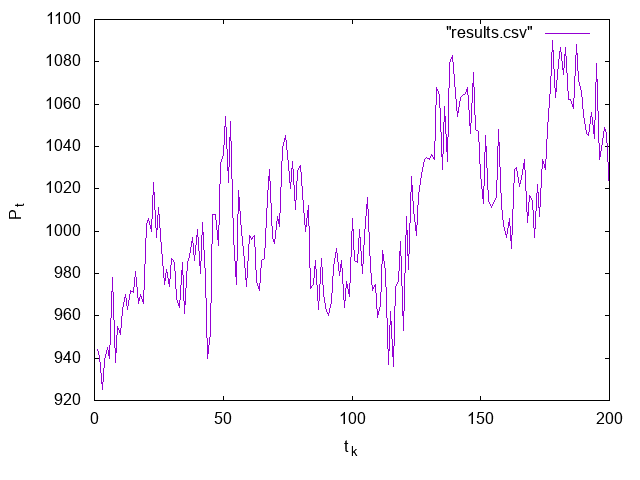

In [15]:
{
    std::stringstream ss("set xrange [0:200]\n"
                        "set xlabel \"t_k\"\n"
                        "set ylabel \"P_t\"\n"
                         "set datafile separator ','\n"
                        "p\"results.csv\" w l\n");
    MATH60082::figure = MATH60082::G.plotCommand(&ss);
}
MATH60082::figure